In [3]:
# coding: utf-8
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
import numpy as np
import psycopg2
import pandas as pd
import jieba
import jieba.analyse
import jieba.posseg as pseg
import re
import random
import pickle as pkl
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
jieba.load_userdict("../dataset/dict.txt.big") 

from quantify_judgement import getGuiltyNum

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.685 seconds.
Prefix dict has been built succesfully.


In [4]:
def jieba_tokenize(text):
    return  [t for t in jieba.lcut(text) if re.match("^[\u4e00-\u9fa5]",t)] 

In [5]:
tfidf_vectorizer = pkl.load(open("../dataset/tfidf_vectorizer.pkl" ,'rb'))
# ix2Squid = pkl.load(open("../dataset/ix2Squid.pkl" ,'rb'))

conn = psycopg2.connect(database="law1", user="datac1", password="datac15543", host="ci.lu.im.ntu.edu.tw", port="5432")
print("Opened database successfully")
cur = conn.cursor()

OperationalError: could not connect to server: Connection timed out
	Is the server running on host "ci.lu.im.ntu.edu.tw" (140.112.106.84) and accepting
	TCP/IP connections on port 5432?


In [1]:
testReasonFact = []
rawData = []
for i in range(11950,11940,-1):
    cur.execute("""SELECT sqlid,main,reasonfact FROM jdata_features WHERE sqlid IN (SELECT sqlid FROM jdata_meta WHERE cat = 'M' and parser_done = 1 and sqlid >= %d and sqlid < %d) """ % ((i-1)*1000,i*1000))
    rows = cur.fetchall()
    for row in rows:
        #print(row)
        guiltyNum = getGuiltyNum(row[0],conn)
        if (np.isnan(guiltyNum)) :
            testReasonFact.append(row[1])
            rawData.append([row[0],getGuiltyNum(row[0],conn)])
        #sqlidRsts.append([row[0],random.randint(0,1200)])
    print(i,len(testReasonFact))

NameError: name 'cur' is not defined

In [31]:
tfidf_test_matrix = tfidf_vectorizer.transform(testReasonFact)

print(tfidf_test_matrix.shape)

#print(sqlidRsts)

(413, 1792897)


In [32]:
clf = TruncatedSVD(n_components=2)

#pca = PCA(n_components=2)
pca_matrix = clf.fit_transform(tfidf_test_matrix)

#print(pca_matrix[:,0])

In [69]:
print(rawData[0])

[11955262, nan, 2, 3, 0, 0, 4, 6, 2, 0, 3, 0, 0, 2, 0, 0, 0, 4, 6, 3, 8, 6, 0, 11, 3, 6, 4, 7, 16, 9, 17, 8, 12, 7, 7, 9, 13, 7, 0, 3, 4, 3, 0, 7, 5, 1, 5, 8, 3, 0, 4, 4, 6, 13, 11, 10, 2, 2, 4, 0, 1, 6, 1, 8, 7, 8, 5, 0, 5, 5, 9, 0, 12, 9]


k = 3


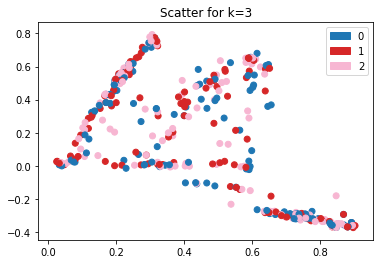

k = 4


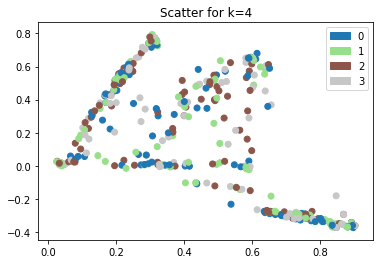

k = 5


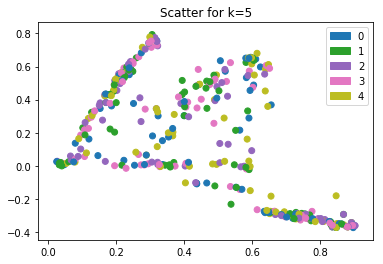

k = 6


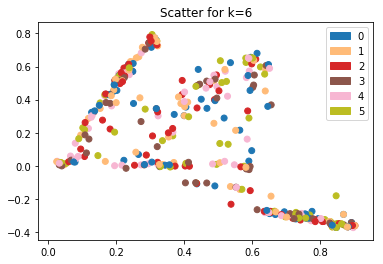

k = 7


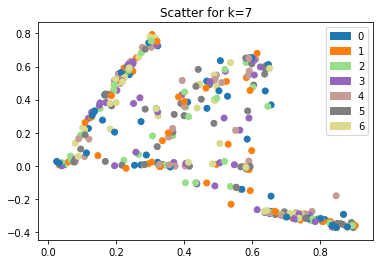

k = 8


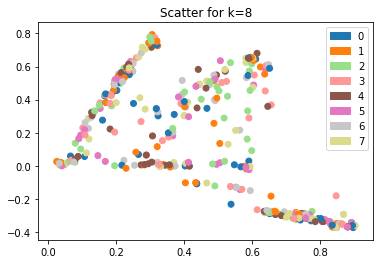

k = 9


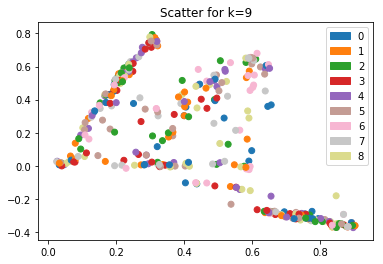

k = 10


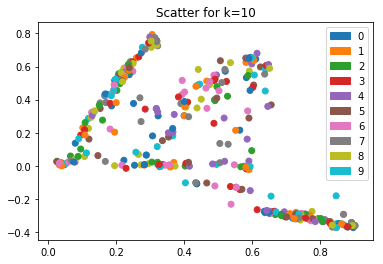

k = 11


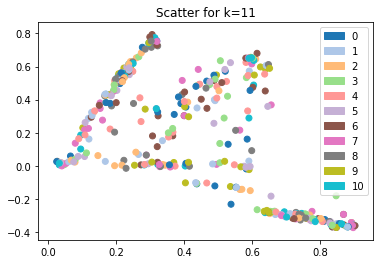

k = 12


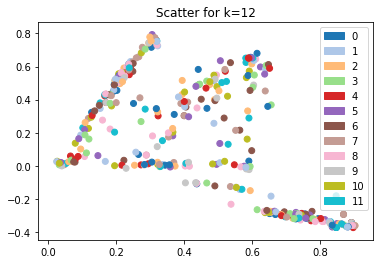

k = 13


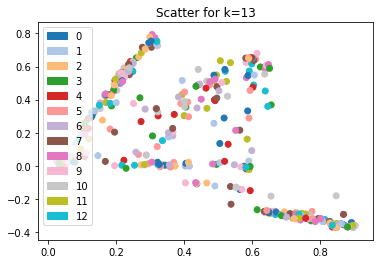

k = 14


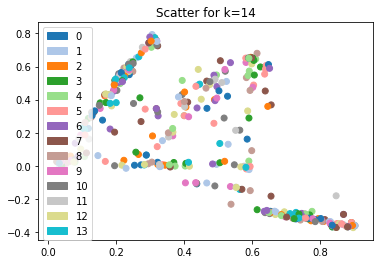

k = 15


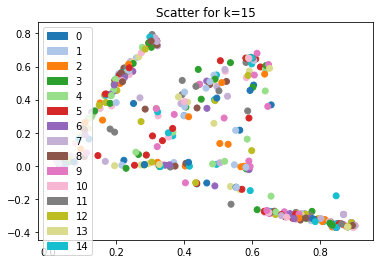

k = 16


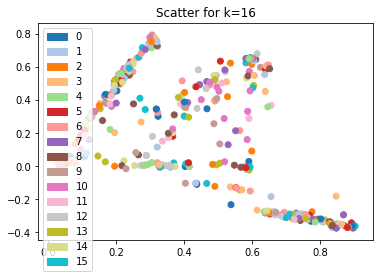

k = 17


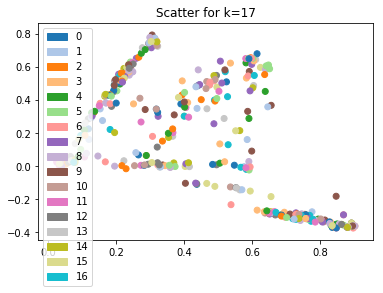

k = 18


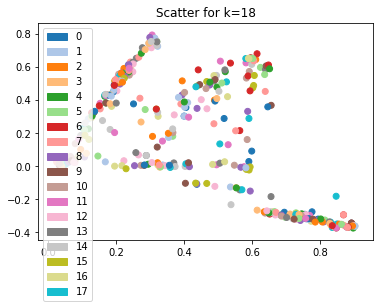

k = 19


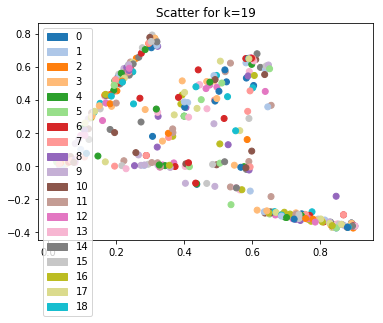

k = 20


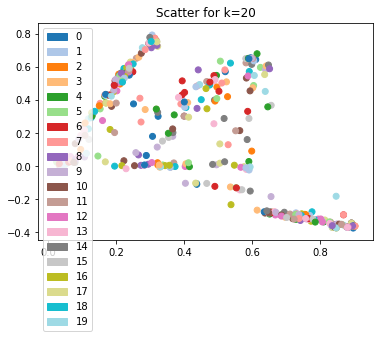

In [71]:
sqlidRsts = [[t[0],t[1]] for t in rawData]
for k in range(3,13):
    print("k = %d" % k)
    
    fig = plt.figure()
    
    title = "Scatter for k=%d" % k
    colors =  plt.cm.tab20( (20/k * np.arange(k)).astype(int) )
    
    patch = []
    for z in range(0,k):
        patch.append(mpatches.Patch(color=colors[z], label = z))
    plt.legend(handles=patch)
    plt.title(title)

    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=5,verbose=0)

    result = km.fit_predict(tfidf_test_matrix)
    
    plt.scatter(pca_matrix[:,0],pca_matrix[:,1],c=colors)
    #plt.show()
    fig.savefig("img/PCA_%d.png" % k,bbox_inches='tight')

    for i in range(0,len(result)):
        sqlidRsts[i].append(result[i])

In [72]:
NPsqlidRsts = [t for t in sqlidRsts if not np.isnan(t[1])]
print(len(NPsqlidRsts))
#print(NPsqlidRsts)

sample = pd.DataFrame(NPsqlidRsts)
sample.head(50)

378


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11955263,3.0,0,1,1,4,1,1,5,8,9,0,10,10,8,1,1,7,16,2
1,11955264,2.0,0,1,1,4,1,1,5,8,9,0,10,10,8,1,6,7,16,2
2,11955265,5.0,0,1,1,4,1,1,5,8,9,0,10,10,8,1,6,7,16,2
3,11955266,4.0,0,1,1,4,1,1,5,0,9,0,10,10,8,1,6,7,16,2
4,11955267,4.0,2,0,2,0,0,4,6,7,10,9,6,13,4,14,14,4,0,7
5,11955268,4.0,0,1,1,4,1,1,5,8,9,0,10,10,8,1,1,7,16,2
6,11955269,4.0,0,1,1,4,1,1,5,8,9,0,10,10,8,1,1,7,16,2
7,11955270,3.0,0,1,1,4,1,1,5,8,9,0,10,10,8,1,1,7,16,2
8,11955271,3.0,2,0,2,0,0,4,6,7,10,9,6,13,4,14,14,4,0,7
9,11955272,3.0,0,1,1,4,1,1,5,8,9,0,10,10,8,1,1,7,16,2


In [74]:
for k in range(3,13):
    print("k = %d" % k)
    print("Label\tMean\tSTD\tCount")
    rst = np.array([t[k-1] for t in NPsqlidRsts])
    for l in range(0,k):
        rstL = np.array( [ NPsqlidRsts[i][1] for i in range(0,len(rst)) if rst[i] == l])
        if len(rstL) > 0 :
            print("%d\t%f\t%f\t%d\n" % (l,rstL.mean(),rstL.std(),len(rstL)))
        else :
            print("%d\t%f\t%f\t%d\n" % (l,-1,-1,len(rstL)))

k = 3
Label	Mean	STD	Count
0	3.294643	1.386403	112

1	28.610778	39.506060	167

2	17.656566	34.391143	99

k = 4
Label	Mean	STD	Count
0	17.886598	34.705499	97

1	3.294643	1.386403	112

2	9.742857	6.086720	70

3	41.505051	46.888084	99

k = 5
Label	Mean	STD	Count
0	28.862069	50.193229	29

1	3.297297	1.392351	111

2	12.927536	23.760471	69

3	41.505051	46.888084	99

4	9.871429	6.080229	70

k = 6
Label	Mean	STD	Count
0	4.000000	1.128152	11

1	9.871429	6.080229	70

2	31.409091	46.676507	44

3	41.783505	47.324985	97

4	3.290909	1.397045	110

5	7.891304	12.332756	46

k = 7
Label	Mean	STD	Count
0	6.055556	7.270989	54

1	3.297297	1.392351	111

2	40.594937	48.103138	79

3	29.750000	50.857381	28

4	22.888889	20.952032	9

5	10.830769	9.800423	65

6	39.125000	42.853493	32

k = 8
Label	Mean	STD	Count
0	38.111111	42.935208	27

1	3.290909	1.397045	110

2	5.928571	7.823630	42

3	30.666667	37.607623	54

4	4.000000	1.128152	11

5	33.160000	52.800515	25

6	24.157895	37.861886	95

7	30.785714	40.407175	14

k 